# Unit 5 - Financial Planning

In [463]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [464]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [465]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [466]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [467]:
# Fetch current BTC price

get_btc_data = requests.get(btc_url)

my_btc_data = get_btc_value.json()

#print(json.dumps(my_btc_data, indent=4))
my_btc_price = my_btc_data['data']['1']['quotes']['CAD']['price']
print(f"Current BTC price is ${my_btc_price:0.2f} CAD")

# Fetch current ETH price

my_eth_data = requests.get(eth_url)
my_eth_data = my_eth_data.json()

#print(json.dumps(my_eth_data, indent=4))
my_eth_price = my_eth_data['data']['1027']['quotes']['CAD']['price']
print(f"Current ETH price is ${my_eth_price:0.2f} CAD")

# Compute current value of my crpto

my_btc_value = my_btc*my_btc_price
my_eth_value= my_eth*my_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} CAD")

Current BTC price is $61679.04 CAD
Current ETH price is $5320.84 CAD
The current value of your 1.2 BTC is $74014.85 CAD
The current value of your 5.3 ETH is $28200.46 CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [468]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [469]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [470]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-09", tz="America/New_York").isoformat()
# Set the tickers
share_tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_portfolio = alpaca.get_barset(
    share_tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open     high     low  close   volume    open   
time                                                                         
2021-12-09 00:00:00-05:00  114.28  114.386  114.12  114.2  8223995  468.15   

                                                               
                               high     low   close    volume  
time                                                           
2021-12-09 00:00:00-05:00  469.6291  466.14  466.34  54963509

In [471]:
# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.2
Current SPY closing price: $466.34


In [472]:
# Compute the current value of shares

my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23317.00
The current value of your 200 AGG shares is $22840.00


### Savings Health Analysis

In [473]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value
assets = ["crypto", "shares"]
df_savings_data = {
    "amount": [crypto_value,shares_value]
}

# Create savings DataFrame

df_savings = pd.DataFrame(df_savings_data,index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,102215.316299
shares,46157.000000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

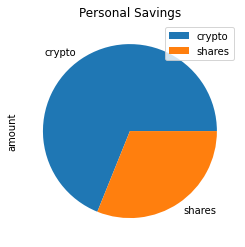

In [474]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")


In [475]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares + crypto

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations, you have enough money in the fund!")
elif total_savings == emergency_fund:
    print("Congrats, you have reached your financial goal")
elif total_savings < emergency_fund:
    print(f"You need ${emergency_fund - total_savings} to reach your goal")

Congratulations, you have enough money in the fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [476]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-09', tz='America/New_York').isoformat()

In [477]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_share_data = alpaca.get_barset(
    share_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df
# Display sample data
df_share_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-19 00:00:00-05:00  109.14  109.16  108.8900  109.00  2583809.0   
2017-12-20 00:00:00-05:00  108.75  108.88  108.7059  108.77  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.87  108.7300  108.83  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.89  108.8100  108.88  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.01  108.8700  108.96  1717408.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-12-19 00:00:00-05:00     NaN      NaN      NaN     NaN         NaN  
2017-12-20 00:00:00-05:00  268.25  268.330  266.690  267.04  42133908.0  
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954.0  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044.0  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478.0

In [478]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = df_share_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [479]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-19 00:00:00-05:00  109.14  109.16  108.8900  109.00  2583809.0   
2017-12-20 00:00:00-05:00  108.75  108.88  108.7059  108.77  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.87  108.7300  108.83  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.89  108.8100  108.88  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.01  108.8700  108.96  1717408.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-19 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-20 00:00:00-05:00    -0.002110  268.25  268.330  266.690  267.04   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   

                                                    
                               volume daily_return  
time                                                
2017-12-19 00:00:00-05:00         NaN          NaN  
2017-12-20 00:00:00-05:00  42133908.0          NaN  
2017-12-21 00:00:00-05:00  34999954.0     0.001985  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159

In [480]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jayhashman/Documents/UnTor/Gitlab-clone/second clone week 5/UTOR-VIRT-FIN-PT-11-2021-U-C/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001728,0.994726,1.005030,0.998162,1.004513,0.995508,0.997603,0.993924,1.013680,0.992513,...,1.005614,1.002419,0.995289,1.005094,1.005946,0.993146,0.994148,0.999702,1.000226,1.003852
2,1.005756,0.982163,0.998293,0.991761,0.993010,0.990675,1.010067,0.987675,0.998966,0.985495,...,0.994800,1.001433,1.000292,0.998755,1.016513,1.000385,0.989004,0.998235,1.002141,0.998801
3,0.996615,0.990746,1.007441,0.994018,0.976665,0.984645,1.014114,0.982780,1.015348,0.996461,...,1.011315,0.999077,1.003462,1.001911,1.022149,0.991834,0.998636,1.005088,1.017683,0.992776
4,1.009897,0.997201,1.002680,0.995616,0.979733,0.982525,1.000997,0.979797,1.007353,1.000534,...,0.991482,1.012571,1.007416,1.003393,1.027389,0.981679,0.983443,1.007821,1.029207,0.988444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.312112,21.573875,13.973586,24.669741,13.777703,27.905085,36.052423,12.343686,9.454151,16.305489,...,18.313320,5.583802,6.123321,10.490090,24.853731,27.656634,24.571980,32.804929,16.905570,23.344455
7557,17.376173,21.631457,13.953108,24.788406,13.841275,27.688241,36.694077,12.292845,9.480394,16.213860,...,18.364239,5.548054,6.116526,10.535509,25.083489,27.607884,24.782843,32.888709,16.806972,23.307179
7558,17.327800,21.753416,13.985339,24.599141,13.930307,27.472719,36.439327,12.278368,9.529370,16.360112,...,18.357524,5.599934,6.136172,10.608852,25.255533,27.327908,25.191756,32.832003,16.774872,23.143518
7559,17.327721,21.631738,14.055626,24.673639,13.934996,27.536675,36.724010,12.310731,9.565935,16.467263,...,18.337522,5.566232,6.165285,10.525271,25.477689,27.046043,25.534893,32.834450,16.986756,23.151482


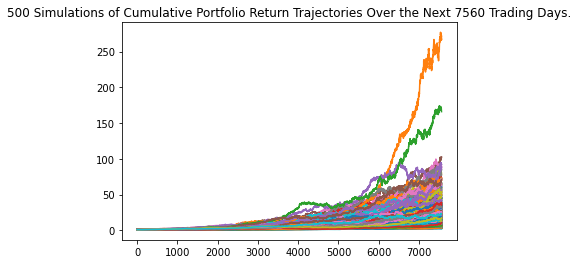

In [481]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()

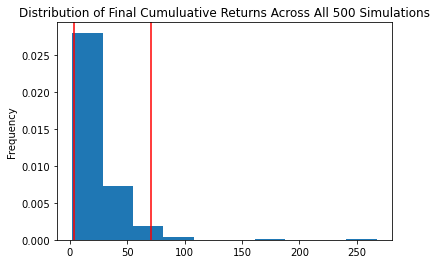

In [482]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [483]:
# Fetch summary statistics from the Monte Carlo simulation results
data_30years_summary = MC_30years.summarize_cumulative_return()


# Print summary statistics
print(data_30years_summary)

count           500.000000
mean             23.228558
std              20.773810
min               2.021179
25%              10.956759
50%              18.173158
75%              29.087762
max             267.224964
95% CI Lower      3.893122
95% CI Upper     70.805369
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [484]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(data_30years_summary[8]*initial_investment,2)
ci_upper = round(data_30years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77862.45 and $1416107.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [485]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(data_30years_summary[8]*initial_investment,2)
ci_upper = round(data_30years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $116793.67 and $2124161.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [486]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = df_share_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [487]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jayhashman/Documents/UnTor/Gitlab-clone/second clone week 5/UTOR-VIRT-FIN-PT-11-2021-U-C/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011443,1.003610,0.999868,1.004759,0.994825,0.993037,0.994723,1.024000,1.021973,0.999659,...,1.002915,0.998961,1.021039,0.993293,0.990892,1.002778,1.006087,0.996483,0.994486,1.000867
2,0.998065,1.004805,0.997108,1.001311,1.003352,0.989143,0.981537,1.014654,1.024026,0.999603,...,1.011848,0.993251,1.026661,0.997373,0.991621,1.006723,1.004459,1.007140,0.994340,1.009977
3,0.996981,1.005205,0.992819,1.009249,1.004267,0.996190,0.984490,1.026506,1.023019,1.000904,...,1.012541,1.000476,1.019264,1.006564,1.002852,1.018422,1.011246,1.013712,1.011624,1.020575
4,0.991580,1.006472,0.998341,1.006467,1.015287,1.002595,0.982242,1.027726,1.025280,1.002315,...,1.005458,0.996765,1.014474,1.010817,1.004137,1.022808,1.017124,0.999491,1.023984,1.009252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.088857,1.736924,3.147232,1.272735,0.901706,1.804467,1.701892,2.300203,2.580070,1.571475,...,1.484783,1.576923,2.205968,1.981087,2.198961,1.450494,1.081262,1.432185,1.573109,1.473594
1257,1.086069,1.735859,3.146194,1.265734,0.901980,1.821873,1.711726,2.262636,2.615377,1.554996,...,1.470299,1.571710,2.205691,1.984512,2.184342,1.464254,1.086382,1.431402,1.604274,1.488662
1258,1.083477,1.742833,3.145194,1.280038,0.878942,1.825875,1.684165,2.253439,2.652189,1.554499,...,1.465922,1.561833,2.199024,1.977269,2.178684,1.447535,1.069043,1.422564,1.606026,1.479780
1259,1.085617,1.727201,3.137213,1.282338,0.879387,1.826792,1.673302,2.272915,2.661290,1.547124,...,1.461841,1.542437,2.169498,1.984829,2.174068,1.449577,1.062971,1.439907,1.628039,1.479227


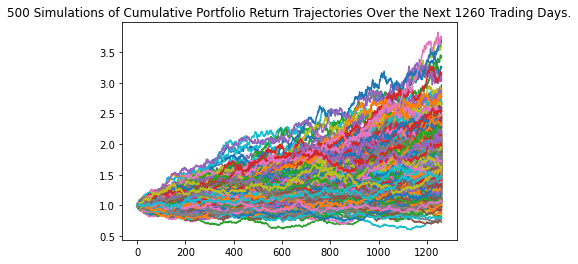

In [488]:
# Plot simulation outcomes
line_plot = MC_5years.plot_simulation()

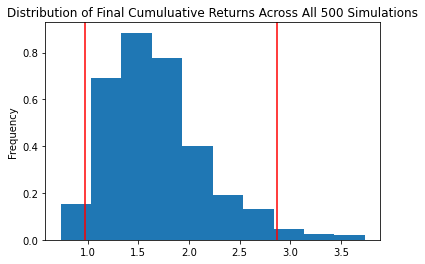

In [489]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5years.plot_distribution()

In [490]:
# Fetch summary statistics from the Monte Carlo simulation results
data_5years_summary = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(data_5years_summary)

count           500.000000
mean              1.685110
std               0.495473
min               0.731061
25%               1.328469
50%               1.619803
75%               1.922614
max               3.737854
95% CI Lower      0.972702
95% CI Upper      2.869210
Name: 1260, dtype: float64


In [491]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(data_5years_summary[8]*initial_investment,2)
ci_upper_five = round(data_5years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $97270.21 and $286920.97


### Ten Years Retirement Option

In [492]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_share_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [493]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jayhashman/Documents/UnTor/Gitlab-clone/second clone week 5/UTOR-VIRT-FIN-PT-11-2021-U-C/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998530,1.003294,0.995698,1.008066,1.003135,1.006268,1.003057,1.001201,1.001083,0.997234,...,1.012191,0.991293,1.005970,1.006810,0.994127,0.997426,1.010864,1.011302,1.007229,0.999855
2,0.998842,1.005375,1.025709,1.001996,1.008988,0.996792,0.997363,1.000205,1.010814,1.001691,...,1.001702,1.001412,1.012811,0.993641,1.006641,0.990538,1.008536,1.023083,0.984520,1.006511
3,1.007271,1.010777,1.017614,1.015720,1.004475,0.989456,0.988918,0.990475,1.001874,0.998066,...,0.999316,0.998399,1.023913,0.995754,1.000438,0.982214,1.015841,1.023097,0.990453,1.009388
4,0.995635,1.012710,1.006146,1.002168,1.018924,0.988195,0.986693,0.986927,0.999946,0.991346,...,1.000150,0.994230,1.028473,1.009885,0.994578,0.988561,1.013527,1.032328,0.996126,1.025942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.019006,3.364710,3.355386,2.653709,1.294660,2.868406,2.397127,3.675756,3.415746,1.378772,...,3.098415,3.896060,2.099595,2.615643,0.729998,3.087848,2.755894,1.103343,3.569511,5.235418
2517,1.997062,3.326582,3.383507,2.702938,1.295369,2.819819,2.392979,3.718604,3.392743,1.375974,...,3.106460,3.864939,2.106691,2.660810,0.738510,3.085997,2.758236,1.103385,3.591217,5.231900
2518,2.014352,3.285353,3.372799,2.690143,1.318896,2.788189,2.409334,3.703972,3.408267,1.365208,...,3.122599,3.851908,2.124405,2.671272,0.739767,3.101119,2.766688,1.091481,3.558348,5.202568
2519,1.999897,3.264798,3.381392,2.682470,1.329481,2.815796,2.409505,3.713199,3.411888,1.358735,...,3.090789,3.861294,2.123013,2.682254,0.734848,3.064037,2.731681,1.103276,3.571326,5.264367


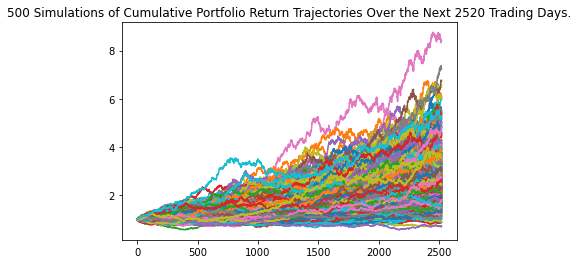

In [494]:
# Plot simulation outcomes
line_plot = MC_10years.plot_simulation()

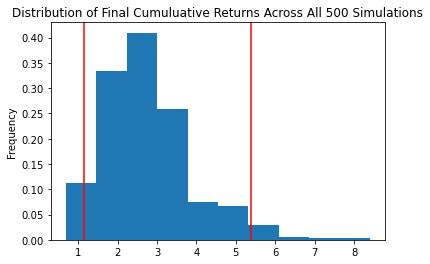

In [495]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10years.plot_distribution()

In [496]:
# Fetch summary statistics from the Monte Carlo simulation results
data_10years_summary = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(data_10years_summary)

count           500.000000
mean              2.748493
std               1.118467
min               0.689440
25%               1.945578
50%               2.596423
75%               3.300307
max               8.403362
95% CI Lower      1.153583
95% CI Upper      5.383556
Name: 2520, dtype: float64


In [497]:
# Set initial investment

initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(data_10years_summary[8]*initial_investment,2)
ci_upper_ten = round(data_10years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $57679.15 and $269177.81
